In [ ]:
0 #mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Libraries
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Input,Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as pi
from keras.optimizers import Adam, RMSprop
from keras import optimizers

print(keras.__version__)

2.5.0


In [ ]:
num_classes =7
image_resize = 48
batch_size_training = 64
batch_size_validation = 64

path_training = '/content/drive/MyDrive/Dataset/FER2013/images/train'
path_validation = '/content/drive/MyDrive/Dataset/FER2013/images/validation'

In [ ]:
data_generator =ImageDataGenerator(
    preprocessing_function = pi
)

In [ ]:
training_generator = data_generator.flow_from_directory(
    path_training,
    target_size = (image_resize,image_resize),
    batch_size = batch_size_training,
    class_mode='categorical')

Found 28831 images belonging to 7 classes.


In [ ]:
validation_generator = data_generator.flow_from_directory(
    path_validation,
    target_size = (image_resize,image_resize),
    batch_size = batch_size_validation,
    class_mode='categorical',
)

Found 7066 images belonging to 7 classes.


In [ ]:
model = Sequential()

In [ ]:
model.add(VGG16(
    include_top = False,
    pooling='avg',
    weights='imagenet',
))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax', name = 'classifer'))

In [ ]:
model.layers[0].layers

In [ ]:
model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 2048)              1050624   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
classifer (Dense)            (None, 7)                 7

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [ ]:
steps_per_epoch_training = training_generator.n/batch_size_training
steps_per_epoch_validation = validation_generator.n/batch_size_validation
num_epochs = 50

print(steps_per_epoch_training)
print(steps_per_epoch_validation)

450.484375
110.40625


In [ ]:
fit_history = model.fit(
    training_generator,
    steps_per_epoch = steps_per_epoch_training,
    epochs = num_epochs ,
    validation_data=validation_generator,
    validation_steps = steps_per_epoch_validation,
    verbose=1)

Epoch 1/50
450/450 [==============================] - 8656s 19s/step - loss: 5.2391 - acc: 0.2893 - val_loss: 1.6012 - val_acc: 0.3780
Epoch 2/50
450/450 [==============================] - 62s 137ms/step - loss: 1.6129 - acc: 0.3684 - val_loss: 1.5649 - val_acc: 0.4021
Epoch 3/50
450/450 [==============================] - 61s 136ms/step - loss: 1.5722 - acc: 0.3883 - val_loss: 1.5667 - val_acc: 0.4043
Epoch 4/50
450/450 [==============================] - 61s 136ms/step - loss: 1.5367 - acc: 0.4080 - val_loss: 1.5313 - val_acc: 0.4234
Epoch 5/50
450/450 [==============================] - 61s 135ms/step - loss: 1.5167 - acc: 0.4152 - val_loss: 1.5182 - val_acc: 0.4203
Epoch 6/50
450/450 [==============================] - 61s 134ms/step - loss: 1.4887 - acc: 0.4243 - val_loss: 1.5208 - val_acc: 0.4244
Epoch 7/50
450/450 [==============================] - 61s 134ms/step - loss: 1.4766 - acc: 0.4306 - val_loss: 1.5188 - val_acc: 0.4233
Epoch 8/50
450/450 [==============================] - 6

In [ ]:
model.save('Model4_1_VGG_Finetune_Adam0.001.h5')

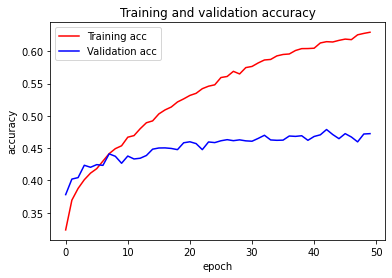

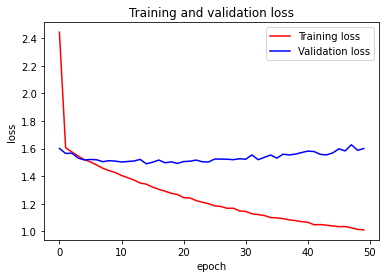

In [ ]:
import matplotlib.pyplot as plt

accuracy = fit_history.history['acc']
val_accuracy = fit_history.history['val_acc']
loss = fit_history.history['loss']
val_loss = fit_history.history['val_loss']
num_epochs = range(len(accuracy))
plt.plot(num_epochs, accuracy, 'r', label='Training acc')
plt.plot(num_epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(num_epochs, loss, 'r', label='Training loss')
plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()